In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
os.chdir("C:/Users/Elijah/Desktop/results-including-0-scores")
allData = pd.DataFrame()
for filename in os.listdir(os.getcwd()):
    file = pd.read_csv(filename)
    allData = pd.concat([allData, file])

In [3]:
allData2 = allData.drop(allData.columns[[0,1]], axis=1)

In [4]:
allData2['Problem Count'] = np.ones(19284)

In [5]:
allData2

,Year,Semester,Quiz #,Student ID,Coding Problem,Score,Maximum,Distance,Percent,Distance Z-score,Distance Min-Max Scaled,Problem Count
0,2017,fall,quiz06,s159c1ea3,AllCharsExcept,3.0,5,44.719697,0.334183,-0.331719,0.089071,1.0
1,2017,fall,quiz06,s1a2bc1e2,AllCharsExcept,5.0,5,37.507576,0.280288,-0.688284,0.015336,1.0
2,2017,fall,quiz06,s1a748834,AllCharsExcept,5.0,5,37.681818,0.281590,-0.679670,0.017117,1.0
3,2017,fall,quiz06,s204527a1,AllCharsExcept,5.0,5,48.295455,0.360904,-0.154934,0.125629,1.0
4,2017,fall,quiz06,s20ffbd50,AllCharsExcept,5.0,5,133.818182,1.000000,4.073288,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
235,2018,fall,quiz11,sf1f60f2f,WriteAndGrade,50.0,50,200.698745,0.335913,-0.738330,0.048055,1.0
236,2018,fall,quiz11,sf39b2f6f,WriteAndGrade,50.0,50,221.213389,0.370248,-0.504492,0.097274,1.0
237,2018,fall,quiz11,sf80872c6,WriteAndGrade,49.0,50,357.129707,0.597734,1.044761,0.423366,1.0
238,2018,fall,quiz11,sfce0219,WriteAndGrade,37.0,50,209.790795,0.351130,-0.634693,0.069868,1.0


In [6]:
students_sum = allData2.groupby("Student ID").sum()

In [8]:
sum_problems = students_sum.loc[:, ['Problem Count']]

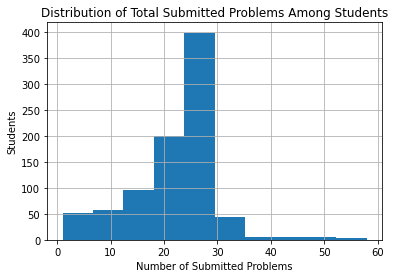

In [9]:
hist_all_problems = sum_problems.hist()
for ax in hist_all_problems.flatten():
    ax.set_xlabel("Number of Submitted Problems")
    ax.set_ylabel("Students")
    ax.set_title("Distribution of Total Submitted Problems Among Students")
plt.savefig('C:/Users/Elijah/Documents/GitHub/code-to-ast/data-analysis/graphs/hist_all_problems.png')

Students scoring lower overall in the quizzes could have a higher distance scores because they tend to be less efficient in answering questions in a time-limited environment.

Stronger correlation found in examining distance score in all submitted programs could be explained by 

*Stability -> examine the stability of the measure across problems for each student
Compare model based on the question vs model based on student (who took the same questions)
Take subset of students who took all of the same questions
    -> create two models: one by student variable and the other by the question variable.
    
before running any clustering, calculate the "Hopkins statistic" of the dataset, or how sufficient is the difference in the dataset's distribution is from the standard, uniform distribution.
    
Can do clustering (on solutions) to reveal if there are canonical solutions in one and "one-off" solutions in another -> 
    then analyze examples from the higher cluster and the lower cluster to evaluate differences.
    
Clustering by students should be done to see if students end up in the same cluster throughout different questions.


In [10]:
os.chdir("C:/Users/Elijah/Desktop/results-only-full-scores")
fullScoreData = pd.DataFrame()
for filename in os.listdir(os.getcwd()):
    file = pd.read_csv(filename)
    fullScoreData = pd.concat([fullScoreData, file])

In [11]:
fullScoreData

,Unnamed: 0,Year,Semester,Quiz #,Student ID,Coding Problem,Score,Maximum,Distance,Percent,Distance Z-score,Distance Min-Max Scaled
0,0,2017,fall,quiz06,s1a2bc1e2,AllCharsExcept,5,5,35.053191,0.272878,-0.387510,0.050811
1,1,2017,fall,quiz06,s1a748834,AllCharsExcept,5,5,35.531915,0.276605,-0.364327,0.055676
2,2,2017,fall,quiz06,s204527a1,AllCharsExcept,5,5,40.319149,0.313872,-0.132494,0.104324
3,3,2017,fall,quiz06,s20ffbd50,AllCharsExcept,5,5,128.457447,1.000000,4.135801,1.000000
4,4,2017,fall,quiz06,s2d43f936,AllCharsExcept,5,5,88.053191,0.685466,2.179134,0.589405
...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,2018,fall,quiz11,seb2c407c,WriteAndGrade,50,50,270.803738,0.698554,1.649165,0.566781
104,104,2018,fall,quiz11,see34afd4,WriteAndGrade,50,50,202.766355,0.523047,0.510975,0.314555
105,105,2018,fall,quiz11,sf0118345,WriteAndGrade,50,50,138.186916,0.356461,-0.569367,0.075148
106,106,2018,fall,quiz11,sf1f60f2f,WriteAndGrade,50,50,141.177570,0.364176,-0.519337,0.086235


In [12]:
fullScoreData2 = fullScoreData.drop(fullScoreData.columns[0], axis=1)

In [13]:
fullScoreData2['Problem Count'] = np.ones(12475)

In [14]:
f_students_sum = fullScoreData2.groupby("Student ID").sum()

In [35]:
f_students_sum

,Year,Score,Maximum,Distance,Percent,Distance Z-score,Distance Min-Max Scaled,Problem Count
Student ID,,,,,,,,
s1041b5c9,10090,40,40,287.836894,2.131140,2.110980,1.255313,5.0
s1052bd77,2018,10,10,34.970803,0.176295,-0.771563,0.000000,1.0
s106e6058,24204,87,87,573.159448,5.127779,0.483528,2.456284,12.0
s116f876e,42336,223,223,1305.652284,8.703735,-1.521941,3.493588,21.0
s121e58a1,56504,299,299,1748.898286,11.292208,-4.307489,4.639362,28.0
...,...,...,...,...,...,...,...,...
sfeb87ba8,12108,40,40,253.147645,1.845749,-1.177963,0.649005,6.0
sfeb9f2b1,54432,249,249,1745.988565,10.740055,-8.571934,3.423937,27.0
sfefcd29e,28238,119,119,619.235536,4.879769,-7.759725,1.128160,14.0


In [15]:
f_sum_problems = f_students_sum.loc[:, ['Problem Count']]

In [36]:
f_sum_problems

,Correct Problem Count
Student ID,
s1041b5c9,5.0
s1052bd77,1.0
s106e6058,12.0
s116f876e,21.0
s121e58a1,28.0
...,...
sfeb87ba8,6.0
sfeb9f2b1,27.0
sfefcd29e,14.0


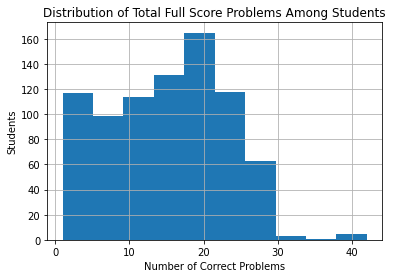

In [16]:
hist2 = f_sum_problems.hist()
for ax in hist2.flatten():
    ax.set_xlabel("Number of Correct Problems")
    ax.set_ylabel("Students")
    ax.set_title("Distribution of Total Full Score Problems Among Students")
plt.savefig('C:/Users/Elijah/Documents/GitHub/code-to-ast/data-analysis/graphs/hist_full_score_problems.png')

In [17]:
f_sum_problems.rename({'Problem Count': 'Correct Problem Count'}, axis=1, inplace=True)

In [18]:
f_students = sum_problems.join(f_sum_problems)

In [19]:
f_students['Correct Problem Count'] = f_students['Correct Problem Count'].fillna(0)

In [20]:
f_students['Proportion'] = f_students['Correct Problem Count'] / f_students['Problem Count']

In [21]:
f_students.describe()

,Problem Count,Correct Problem Count,Proportion
count,867.000000,867.000000,867.000000
mean,22.242215,14.388697,0.586105
std,8.045564,8.430809,0.268762
min,1.000000,0.000000,0.000000
25%,19.000000,8.000000,0.421053
50%,24.000000,15.000000,0.633333
75%,27.000000,21.000000,0.800000
max,58.000000,42.000000,1.000000


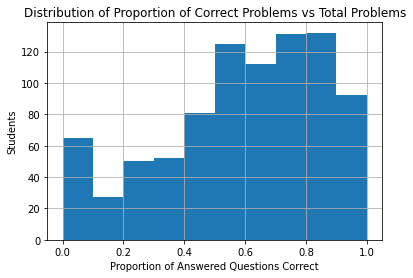

In [22]:
hist3 = f_students['Proportion'].hist()
hist3.set_xlabel("Proportion of Answered Questions Correct")
hist3.set_ylabel("Students")
hist3.set_title("Distribution of Proportion of Correct Problems vs Total Problems")
plt.savefig('C:/Users/Elijah/Documents/GitHub/code-to-ast/data-analysis/graphs/hist_prop_correct_problems.png')

### Analyzing 25-75 percentile of problem count students

In [27]:
students_sum

,Year,Score,Maximum,Distance,Percent,Distance Z-score,Distance Min-Max Scaled,Problem Count
Student ID,,,,,,,,
s1041b5c9,38342,51.0,200,1770.285368,10.419047,14.486684,6.623500,19.0
s1052bd77,20180,13.0,81,675.390050,5.113632,2.145259,2.922636,10.0
s106e6058,42357,122.0,164,1270.516866,8.273461,-1.175317,3.500983,21.0
s116f876e,60480,263.0,299,2143.618279,12.586670,-6.006782,4.715999,30.0
s1187ca0f,12108,0.0,50,705.691608,3.325700,10.493843,2.525706,6.0
...,...,...,...,...,...,...,...,...
sfeb87ba8,36324,105.0,174,1484.493718,7.368269,-0.413397,3.224258,18.0
sfeb9f2b1,60480,283.0,294,2175.223685,11.802001,-10.395691,3.549980,30.0
sfefcd29e,52442,144.0,254,1774.637752,9.534438,-9.677308,2.739074,26.0


In [29]:
range_df = students_sum[(students_sum['Problem Count'] >= 19) & (students_sum['Problem Count'] <= 27)]

In [59]:
range_df2 = range_df.loc[:, ['Problem Count', 'Score', 'Maximum']]

In [60]:
range_df2

,Problem Count,Score,Maximum
Student ID,,,
s1041b5c9,19.0,51.0,200
s106e6058,21.0,122.0,164
s125ba958,23.0,215.0,224
s126cf4ce,27.0,274.0,294
s1357ef63,21.0,130.0,167
...,...,...,...
sfdd9b780,21.0,155.0,224
sfe32615d,27.0,262.0,289
sfe579fbb,24.0,210.0,239


In [61]:
range_df_f = range_df2.join(f_sum_problems)

In [62]:
avg_zscore = fullScoreData2.groupby("Student ID").mean()

In [63]:
avg_zscore

,Year,Score,Maximum,Distance,Percent,Distance Z-score,Distance Min-Max Scaled,Problem Count
Student ID,,,,,,,,
s1041b5c9,2018.0,8.000000,8.000000,57.567379,0.426228,0.422196,0.251063,1.0
s1052bd77,2018.0,10.000000,10.000000,34.970803,0.176295,-0.771563,0.000000,1.0
s106e6058,2017.0,7.250000,7.250000,47.763287,0.427315,0.040294,0.204690,1.0
s116f876e,2016.0,10.619048,10.619048,62.173918,0.414464,-0.072473,0.166361,1.0
s121e58a1,2018.0,10.678571,10.678571,62.460653,0.403293,-0.153839,0.165691,1.0
...,...,...,...,...,...,...,...,...
sfeb87ba8,2018.0,6.666667,6.666667,42.191274,0.307625,-0.196327,0.108168,1.0
sfeb9f2b1,2016.0,9.222222,9.222222,64.666243,0.397780,-0.317479,0.126812,1.0
sfefcd29e,2017.0,8.500000,8.500000,44.231110,0.348555,-0.554266,0.080583,1.0


In [64]:
avg_zscore2 = avg_zscore.loc[:, ['Distance Z-score']]

In [65]:
avg_zscore2

,Distance Z-score
Student ID,
s1041b5c9,0.422196
s1052bd77,-0.771563
s106e6058,0.040294
s116f876e,-0.072473
s121e58a1,-0.153839
...,...
sfeb87ba8,-0.196327
sfeb9f2b1,-0.317479
sfefcd29e,-0.554266


In [66]:
final = range_df_f.join(avg_zscore2)

In [70]:
final

,Problem Count,Score,Maximum,Correct Problem Count,Distance Z-score
Student ID,,,,,
s1041b5c9,19.0,51.0,200,5.0,0.422196
s106e6058,21.0,122.0,164,12.0,0.040294
s125ba958,23.0,215.0,224,19.0,1.027875
s126cf4ce,27.0,274.0,294,23.0,-0.055917
s1357ef63,21.0,130.0,167,10.0,0.089789
...,...,...,...,...,...
sfdd9b780,21.0,155.0,224,8.0,-0.349962
sfe32615d,27.0,262.0,289,20.0,-0.511587
sfe579fbb,24.0,210.0,239,15.0,-0.086344


In [71]:
final2 = final.dropna()

In [72]:
final2

,Problem Count,Score,Maximum,Correct Problem Count,Distance Z-score
Student ID,,,,,
s1041b5c9,19.0,51.0,200,5.0,0.422196
s106e6058,21.0,122.0,164,12.0,0.040294
s125ba958,23.0,215.0,224,19.0,1.027875
s126cf4ce,27.0,274.0,294,23.0,-0.055917
s1357ef63,21.0,130.0,167,10.0,0.089789
...,...,...,...,...,...
sfdd9b780,21.0,155.0,224,8.0,-0.349962
sfe32615d,27.0,262.0,289,20.0,-0.511587
sfe579fbb,24.0,210.0,239,15.0,-0.086344


In [75]:
final2['Quiz Performance'] = final2["Score"] / final2["Maximum"]

<ipython-input-75-73bb28087b0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final2['Quiz Performance'] = final2["Score"] / final2["Maximum"]


In [76]:
final2

,Problem Count,Score,Maximum,Correct Problem Count,Distance Z-score,Quiz Performance
Student ID,,,,,,
s1041b5c9,19.0,51.0,200,5.0,0.422196,0.255000
s106e6058,21.0,122.0,164,12.0,0.040294,0.743902
s125ba958,23.0,215.0,224,19.0,1.027875,0.959821
s126cf4ce,27.0,274.0,294,23.0,-0.055917,0.931973
s1357ef63,21.0,130.0,167,10.0,0.089789,0.778443
...,...,...,...,...,...,...
sfdd9b780,21.0,155.0,224,8.0,-0.349962,0.691964
sfe32615d,27.0,262.0,289,20.0,-0.511587,0.906574
sfe579fbb,24.0,210.0,239,15.0,-0.086344,0.878661


In [77]:
final2.to_csv("25-75QuartileStudentData.csv")